<a href="https://colab.research.google.com/github/NeuralDataMind/Tensorflow/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_data =keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

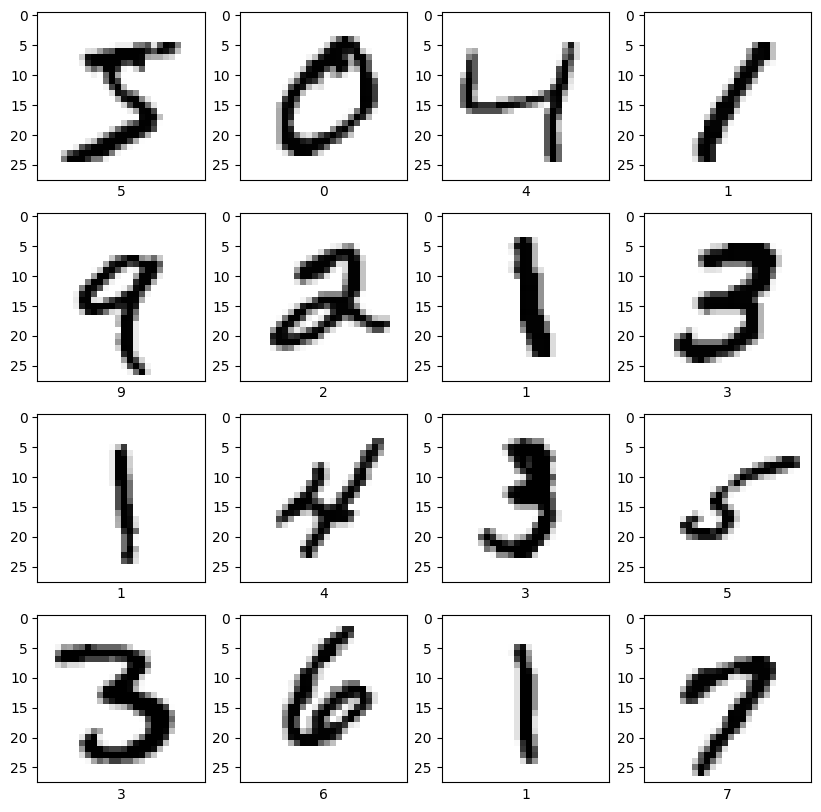

In [10]:
def show():
  plt.figure(figsize=(10, 10))

  for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.xticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    # Access the scalar label directly from y_train
    plt.xlabel(class_names[y_train[i]])

  plt.show()

show()

In [11]:
model = keras.models.Sequential([
    layers.Flatten(input_shape =(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    verbose = 1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8775 - loss: 0.4294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9641 - loss: 0.1219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9769 - loss: 0.0773
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9851 - loss: 0.0477
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0340
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0216
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0166
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9948 - loss: 0.0154


In [19]:
model.evaluate(
    x_test,
    y_test,
    batch_size = 32,
    verbose = 1
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.0944


[0.0824550986289978, 0.9771999716758728]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class for the first test image: 7


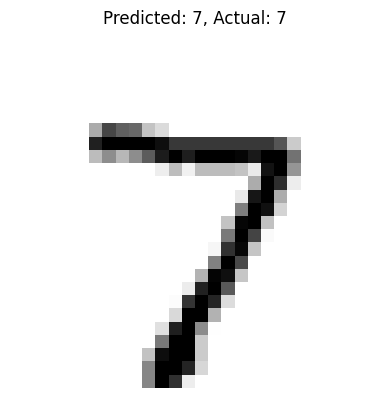

In [20]:
# prompt: a predicting code for this

predictions = model.predict(x_test)
# Predict the class for the first test image
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class
print(f"Predicted class for the first test image: {predicted_class_name}")

# You can visualize the prediction for the first image
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_class_name}, Actual: {class_names[y_test[0]]}")
plt.axis('off')
plt.show()